<a href="https://colab.research.google.com/github/meenugopal/NYC-Taxi-Trip/blob/master/NYC_tt_duration_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Domain Name - Transportation

# Dataset - NYC Taxi Trip UCI

# Business Objective 
The dataset contains 1458644 NYC taxi trip records.
Build a model that predicts the total trip duration of taxi trips in New York City.

### Table of Contents

1. [Dataset Description](#titanic)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Feature Engineering](#fe)
5. [Linear Regression](#lr)
     - 5.1 [Create Features And Label](#tdt)
     - 5.2 [Split Train And Test Data](#pdt)
     - 5.3 [Create Instance Of the Model](#edt)
     - 5.4 [Fit Model](#ptdt)     
     - 5.5 [Predict Using Trained Model](#edt)
     - 5.6 [Evaluate Model Performance](#ptdt)
     
6. [Lasso Regression](#ls)
7. [Decision Tree](#dt)
     - 7.1 [Training Decision Tree Model](#tdt)
     - 7.2 [Predictions from Decision Tree Model](#pdt)
     - 7.3 [Evaluating the Decision Tree Model](#edt)
     - 7.4 [Parameter Tuning](#ptdt)
8. [Random Forest](#rf)
     - 8.1 [Training Random Forest Model](#trf)
     - 8.2 [Predictions from Random Forest Model](#prf)
     - 8.3 [Evaluating the Random Forest Model](#erf)
9. [Support Vector Regressor](#rf)
10. [KNN Regressor](#rf)
11. [Hyper Parameter Optimization with GridSearchCV and RandomizedSearchCV](#rf)

### 1. Description of Dataset

Build a model that predicts the total trip duration of taxi trips in New York City.

Below are the attributes of the dataset,

●	id - a unique identifier for each trip

●	vendor_id - a code indicating the provider associated with the trip record

●	pickup_datetime - date and time when the meter was engaged

●	dropoff_datetime - date and time when the meter was disengaged

●	passenger_count - the number of passengers in the vehicle (driver entered value)

●	pickup_longitude - the longitude where the meter was engaged

●	pickup_latitude - the latitude where the meter was engaged

●	dropoff_longitude - the longitude where the meter was disengaged

●	dropoff_latitude - the latitude where the meter was disengaged

●	store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

●	trip_duration - duration of the trip in seconds


### 2. Importing the packages and dataset  <a id='packages'>

###### SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model
###### ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions. 
###### LIME is a great tool explaining what machine learning classifiers are doing

In [1]:
!pip -q install plotly-express
!pip -q install shap
!pip -q install eli5
!pip -q install lime


     |████████████████████████████████| 266kB 6.8MB/s 
     |████████████████████████████████| 112kB 6.7MB/s 
     |████████████████████████████████| 276kB 6.4MB/s 


In [0]:
#!pip -q install vaex


     |████████████████████████████████| 2.2MB 4.1MB/s 
     |████████████████████████████████| 2.9MB 35.6MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 60.5MB 146kB/s 


In [0]:
!pip -q install dask

In [3]:
#import the libraries requires for project
import numpy as np
import pandas as pd
import plotly.express as px
import pickle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
os.getcwd()

'/content'

In [0]:
# Code for displaying plotly express plot
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
import plotly_express as px

In [0]:
# print multiple statement in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [0]:
#import vaex as vx

In [0]:
import pandas_profiling
import collections
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls

drive  sample_data


In [0]:
# Dataframes implement the Pandas API
import dask.dataframe as dd
df = dd.read_csv('/content/drive/My Drive/train.csv')

In [11]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
#taxi_trip_10K.describe()
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
npartitions=1,,,,,,,
,int64,int64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...


In [0]:
df_NYC = df.compute()

In [15]:
df_NYC.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [0]:
eda_analysis = pandas_profiling.ProfileReport(df_NYC)
eda_analysis.to_file("ML_NYC_taxi.html")

In [17]:
from IPython.display import display,HTML,IFrame

display(HTML(open('ML_NYC_taxi.html').read()))

Number of variables,12
Number of observations,1458644
Total Missing (%),0.0%
Total size in memory,133.5 MiB
Average record size in memory,96.0 B
Numeric,7
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,0


### 3. Exploring the dataset  <a id='explore'>

In [18]:
df_NYC.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [19]:
df_NYC.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62450,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
62451,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
62452,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
62453,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
62454,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [20]:
df_NYC.shape

(1458644, 11)

In [21]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 62454
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 133.5+ MB


In [22]:
df_NYC.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [23]:
df_NYC.describe(include = 'all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2218912,NaN,2016-05-07 13:18:07,2016-05-16 19:40:28,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [0]:
import seaborn as sns

In [0]:
# Importing the packages
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1152x576 with 0 Axes>

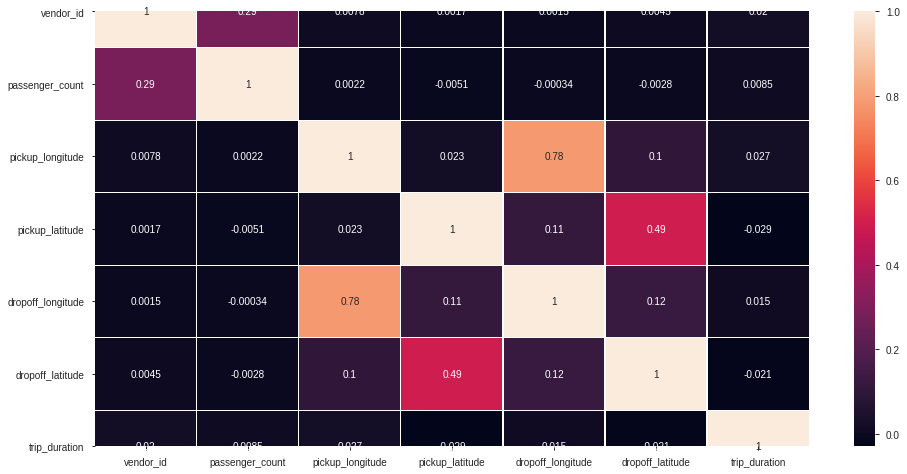

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(df_NYC.corr(), annot=True, linewidths=.1,)

From the correlation diagram we can see pickup_longitude, pickup latitude is positively correclated with dropoff_latitude and dropoff_latitude

### 4. Feature Engineering

In [0]:
df_NYC.dropna(how='all',inplace=True)

In [0]:
df_NYC.shape

(1458644, 11)

In [0]:
#Find Null values if any
df_NYC.isnull().values.any()

False

In [0]:
df_NYC

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
62450,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
62451,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
62452,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
62453,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [0]:
#Convert Object type to String
df_NYC["pickup_datetime"]=pd.to_datetime(df_NYC["pickup_datetime"])
df_NYC["dropoff_datetime"]=pd.to_datetime(df_NYC["dropoff_datetime"])

In [0]:
#Split hour from time into new column
#df_NYC["Hour"]=df_NYC["Time"].apply(lambda x: int(x.split(':')[0]))

In [0]:
from datetime import datetime

In [0]:
print (df_NYC["pickup_datetime"].dtype)
print (df_NYC["dropoff_datetime"].dtype)

datetime64[ns]
datetime64[ns]


In [0]:
df_NYC["picup_Date"] = pd.to_datetime(df_NYC["pickup_datetime"]) 
df_NYC["dropof_Date"] = pd.to_datetime(df_NYC["dropoff_datetime"]) 
#print (df_air_O['Date'].dtype)

In [0]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 62454
Data columns (total 13 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
picup_Date            1458644 non-null datetime64[ns]
dropof_Date           1458644 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(4), int64(3), object(2)
memory usage: 155.8+ MB


In [0]:
df_NYC.shape

(1458644, 13)

In [0]:
df_NYC.shape

(1458644, 13)

In [0]:
df_NYC.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picup_Date,dropof_Date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,2016-03-14 17:32:30
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,2016-06-12 00:54:38
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,2016-01-19 12:10:48
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,2016-04-06 19:39:40
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,2016-03-26 13:38:10
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016-01-30 22:01:40,2016-01-30 22:09:03
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016-06-17 22:34:59,2016-06-17 22:40:40
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016-05-21 07:54:58,2016-05-21 08:20:49
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016-05-27 23:12:23,2016-05-27 23:16:38
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016-03-10 21:45:01,2016-03-10 22:05:26


In [0]:
#df_NYC.to_excel("NYC.xlsx",sheet_name='Sheet_name_1')

In [0]:
#For extracting year,month and day to new column, the code as below:
df_NYC['picupYear'] = df_NYC['pickup_datetime'].dt.year
df_NYC['picupMonth'] = df_NYC['pickup_datetime'].dt.month
df_NYC['picupDay'] = df_NYC['pickup_datetime'].dt.day
df_NYC['picupTime'] = df_NYC['pickup_datetime'].dt.time

In [0]:
df_NYC['dropofYear'] = df_NYC['dropoff_datetime'].dt.year
df_NYC['dropofMonth'] = df_NYC['dropoff_datetime'].dt.month
df_NYC['dropofDay'] = df_NYC['dropoff_datetime'].dt.day
df_NYC['dropofTime'] = df_NYC['dropoff_datetime'].dt.time

In [0]:
df_NYC.shape

(1458644, 21)

In [0]:
df_NYC.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picup_Date,dropof_Date,picupYear,picupMonth,picupDay,picupTime,dropofYear,dropofMonth,dropofDay,dropofTime
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,2016-03-14 17:32:30,2016,3,14,17:24:55,2016,3,14,17:32:30
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,2016-06-12 00:54:38,2016,6,12,00:43:35,2016,6,12,00:54:38
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,2016-01-19 12:10:48,2016,1,19,11:35:24,2016,1,19,12:10:48
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,2016-04-06 19:39:40,2016,4,6,19:32:31,2016,4,6,19:39:40
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,2016-03-26 13:38:10,2016,3,26,13:30:55,2016,3,26,13:38:10


In [0]:
df_NYC['long'] = df_NYC['dropoff_longitude'] - df_NYC['pickup_longitude']
df_NYC['lat']  = df_NYC['dropoff_latitude'] - df_NYC['pickup_latitude']

In [0]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 62454
Data columns (total 23 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
picup_Date            1458644 non-null datetime64[ns]
dropof_Date           1458644 non-null datetime64[ns]
picupYear             1458644 non-null int64
picupMonth            1458644 non-null int64
picupDay              1458644 non-null int64
picupTime             1458644 non-null object
dropofYear            1458644 non-null int64
dropofMonth           1458644 no

In [0]:
df_NYC['store_and_fwd_flag'].isnull().sum()

0

In [0]:
#df_NYC = df_NYC.drop(['pickup_datetime'], axis = 1)
#df_NYC = df_NYC.drop(['dropoff_datetime'], axis = 1)

In [0]:
df_NYC.shape

(1458644, 21)

In [0]:
df_NYC.head(5)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picup_Date,dropof_Date,picupYear,picupMonth,picupDay,picupTime,dropofYear,dropofMonth,dropofDay,dropofTime,long,lat
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,2016-03-14 17:32:30,2016,3,14,17:24:55,2016,3,14,17:32:30,0.017525,-0.002335
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,2016-06-12 00:54:38,2016,6,12,00:43:35,2016,6,12,00:54:38,-0.019066,-0.007412
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,2016-01-19 12:10:48,2016,1,19,11:35:24,2016,1,19,12:10:48,-0.026306,-0.053852
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,2016-04-06 19:39:40,2016,4,6,19:32:31,2016,4,6,19:39:40,-0.002228,-0.013252
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,2016-03-26 13:38:10,2016,3,26,13:30:55,2016,3,26,13:38:10,0.000130,-0.010689


In [0]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 62454
Data columns (total 23 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
picup_Date            1458644 non-null datetime64[ns]
dropof_Date           1458644 non-null datetime64[ns]
picupYear             1458644 non-null int64
picupMonth            1458644 non-null int64
picupDay              1458644 non-null int64
picupTime             1458644 non-null object
dropofYear            1458644 non-null int64
dropofMonth           1458644 no

In [0]:
df_NYC['picup_Date'].nunique()


1380222

In [0]:
df_NYC['dropof_Date'].nunique()

1380377

In [0]:
df_NYC['pickup_day']=df_NYC['picup_Date'].dt.day_name()


In [0]:
df_NYC['dropoff_day']=df_NYC['dropof_Date'].dt.day_name()

In [0]:
df_NYC.shape

(1458644, 23)

In [0]:
df_NYC.head(5)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picup_Date,dropof_Date,picupYear,picupMonth,picupDay,picupTime,dropofYear,dropofMonth,dropofDay,dropofTime,long,lat,pickup_day,dropoff_day
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,2016-03-14 17:32:30,2016,3,14,17:24:55,2016,3,14,17:32:30,0.017525,-0.002335,Monday,Monday
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,2016-06-12 00:54:38,2016,6,12,00:43:35,2016,6,12,00:54:38,-0.019066,-0.007412,Sunday,Sunday
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,2016-01-19 12:10:48,2016,1,19,11:35:24,2016,1,19,12:10:48,-0.026306,-0.053852,Tuesday,Tuesday
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,2016-04-06 19:39:40,2016,4,6,19:32:31,2016,4,6,19:39:40,-0.002228,-0.013252,Wednesday,Wednesday
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,2016-03-26 13:38:10,2016,3,26,13:30:55,2016,3,26,13:38:10,0.000130,-0.010689,Saturday,Saturday


#### To explore the daywise trip count

In [0]:
df_NYC['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [0]:
df_NYC['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

Text(0.5, 1.0, 'Number of Pickups done on each day of the week')

Text(0.5, 1.0, 'Number of dropoffs done on each day of the week')

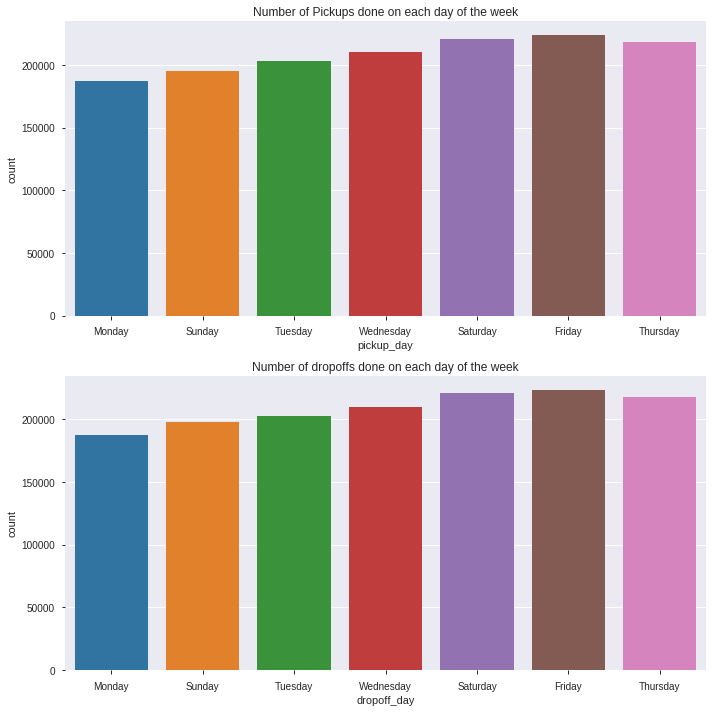

In [0]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df_NYC,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df_NYC,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [0]:
df_NYC = df.compute()

#### we divide the times into 4 time zones: morning (4 hrs to 10 hrs) , midday (10 hrs to 16 hrs) , evening (16 hrs to 22 hrs) and late night (22 hrs to 4 hrs)

In [0]:
from datetime import datetime

In [0]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
    df_NYC['pickup_timezone']=df_NYC['picup_Date'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
    df_NYC['dropoff_timezone']=df_NYC['dropof_Date'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


In [0]:
df_NYC.head(5)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picup_Date,dropof_Date,picupYear,picupMonth,picupDay,picupTime,dropofYear,dropofMonth,dropofDay,dropofTime,long,lat,pickup_day,dropoff_day
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,2016-03-14 17:32:30,2016,3,14,17:24:55,2016,3,14,17:32:30,0.017525,-0.002335,Monday,Monday
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,2016-06-12 00:54:38,2016,6,12,00:43:35,2016,6,12,00:54:38,-0.019066,-0.007412,Sunday,Sunday
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,2016-01-19 12:10:48,2016,1,19,11:35:24,2016,1,19,12:10:48,-0.026306,-0.053852,Tuesday,Tuesday
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,2016-04-06 19:39:40,2016,4,6,19:32:31,2016,4,6,19:39:40,-0.002228,-0.013252,Wednesday,Wednesday
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,2016-03-26 13:38:10,2016,3,26,13:30:55,2016,3,26,13:38:10,0.000130,-0.010689,Saturday,Saturday


ValueError: ignored

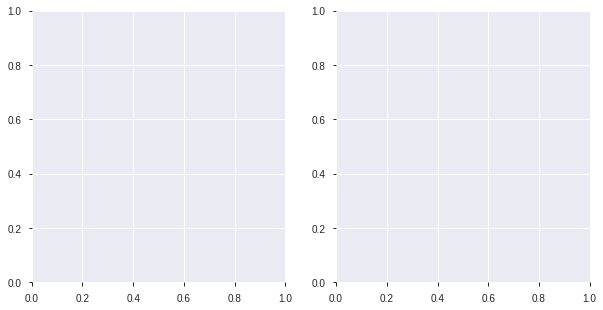

In [0]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df_NYC,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df_NYC,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

In [0]:
df_NYC = df.compute()

In [0]:
df_NYC['id'] =  (df_NYC['id']).astype(str)

In [0]:
df_NYC['store_and_fwd_flag'] = df_NYC['store_and_fwd_flag'].astype(str)

In [0]:
df_NYC.shape

(1458644, 23)

In [0]:
df_NYC = df_NYC.dropna()

In [0]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 62454
Data columns (total 23 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
picup_Date            1458644 non-null datetime64[ns]
dropof_Date           1458644 non-null datetime64[ns]
picupYear             1458644 non-null int64
picupMonth            1458644 non-null int64
picupDay              1458644 non-null int64
picupTime             1458644 non-null object
dropofYear            1458644 non-null int64
dropofMonth           1458644 no

In [0]:
df_NYC.dtypes

In [0]:
#Find Null values if any
df_NYC.isnull().values.any()

False

In [0]:
#df_NYC = df_NYC.apply (pd.to_numeric, errors='coerce')

In [0]:
print (df_NYC)

In [0]:
df_NYC.shape

(1458644, 23)

In [0]:
df_NYC.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
picup_Date            0
dropof_Date           0
picupYear             0
picupMonth            0
picupDay              0
picupTime             0
dropofYear            0
dropofMonth           0
dropofDay             0
dropofTime            0
long                  0
lat                   0
dtype: int64

In [0]:
df_air_O.shape

In [0]:
df_air_O.head()

In [0]:
sns.jointplot('RH', 'AH', df_air_O, kind='scatter', color='seagreen')

In [0]:
sns.jointplot('C6H6(GT)', 'RH', df_air_O, kind='scatter', color='blue')

In [0]:
sns.jointplot('T', 'RH', df_air_O, kind='scatter', color='pink')

In [0]:
df_air_O.head()

In [0]:
df_air_O["CO(GT)"]=df_air_O["CO(GT)"].fillna(df_air_O.groupby(["Month","Hour"])["CO(GT)"].transform('mean'))

In [0]:
df_air_O["NOx(GT)"]=df_air_O["NOx(GT)"].fillna(df_air_O.groupby(["Hour","Month"])["NOx(GT)"].transform('mean'))

In [0]:
df_air_O["NO2(GT)"]=df_air_O["NO2(GT)"].fillna(df_air_O.groupby(['Hour','Month'])["NO2(GT)"].transform('mean'))

In [0]:
df_air_O.shape

In [0]:
df_air_O.head()

In [0]:
# column value replaced by  year, day and hourly mena value
df_air_O["CO(GT)"]=df_air_O["CO(GT)"].fillna(df_air_O.groupby(['Hour','Day','Year'])["CO(GT)"].transform('mean'))

In [0]:
df_air_O["NOx(GT)"]=df_air_O["NOx(GT)"].fillna(df_air_O.groupby(['Hour','Day','Year'])["NOx(GT)"].transform('mean'))

In [0]:
df_air_O["NO2(GT)"]=df_air_O["NO2(GT)"].fillna(df_air_O.groupby(['Hour','Day','Year'])["NO2(GT)"].transform('mean'))

In [0]:
df_NYC.to_excel("NYC_TAXI.xlsx",sheet_name='Sheet_name_1')

In [0]:
df_NYC.to_csv("NYC_TAXI.csv")

** Descriptive Statistics**

In [0]:
#df_air_O[df_air_O['NOx(GT)']==-200].iloc[0:8991]

In [0]:
#airQuality_df = df_air_O

In [0]:
print('Count of missing values:\n',df_air_O.shape[0]-df_air_O.count())

In [0]:
df_air_O.describe(include = 'all')

In [0]:
df_air_O = df_air_O.fillna(0)

In [0]:
df_air_O["CO(GT)"] = df_air_O["CO(GT)"].replace(0,df_air_O["CO(GT)"].median())

In [0]:
df_air_O["PT08.S1(CO)"] = df_air_O["PT08.S1(CO)"].replace(0,df_air_O["PT08.S1(CO)"].median())

In [0]:
df_air_O["C6H6(GT)"] = df_air_O["C6H6(GT)"].replace(0,df_air_O["C6H6(GT)"].median())

In [0]:
df_air_O["PT08.S2(NMHC)"] = df_air_O["PT08.S2(NMHC)"].replace(0,df_air_O["PT08.S2(NMHC)"].median())

In [0]:
df_air_O["PT08.S3(NOx)"] = df_air_O["PT08.S3(NOx)"].replace(0,df_air_O["PT08.S3(NOx)"].median())

In [0]:
df_air_O["NO2(GT)"] = df_air_O["NO2(GT)"].replace(0,df_air_O["NO2(GT)"].median())

In [0]:
df_air_O["PT08.S4(NO2)"] = df_air_O["PT08.S4(NO2)"].replace(0,df_air_O["PT08.S4(NO2)"].median())

In [0]:
df_air_O["PT08.S5(O3)"] = df_air_O["PT08.S5(O3)"].replace(0,df_air_O["PT08.S5(O3)"].median())

In [0]:
df_air_O["T"] = df_air_O["T"].replace(0,df_air_O["T"].median())

In [0]:
df_air_O["AH"] = df_air_O["AH"].replace(0,df_air_O["AH"].median())

In [0]:
df_air_O["RH"] = df_air_O["RH"].replace(0,df_air_O["RH"].median())

In [0]:
df_air_O["Month_Str"] = df_air_O["Month_Str"].astype(str)

In [0]:
df_air_O["Month"].isnull().sum()

In [0]:
df_air_O.info()

In [0]:
#to select all numerical variables
df_num = df_air_O.select_dtypes(include=['float64','int64'])
#PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3), T and AH
#df_num = df_air_O[['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','RH','AH','T','Hour','Year','Month','Day']]
df_num.head()

In [0]:
#to find the missing values in the dataset
plt.figure(figsize=(10,7))
sns.heatmap(df_num.isnull(),cmap="viridis",cbar=False,yticklabels=False)

No missing value in the dataset

In [0]:
df_num.describe(include='all')

In [0]:
df_num.head()

In [0]:
#df_num.hist(bins = 20, figsize=(14,12))

In [0]:
#import seaborn as sns

In [0]:
plt.figure(figsize=(14,6))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5,)
plt.show()

## Observation: The heat map illustrates that RH is dependent on few column values that could be considered for linear regression.

In [0]:
sample = df_air_O[['CO(GT)','PT08.S1(CO)','NOx(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S5(O3)','RH','AH','T']]

In [0]:
plt.figure(figsize=(14,6))
sns.heatmap(sample.corr(), annot=True, linewidths=.5,)
plt.show()

#### Observation: The heat map illustrates that RH is positively correlated with CO(GT), PT08.S1(CO),NOx(GT),PT08.S5(O3),AH and negative correlated with T


In [0]:
sample.hist(bins = 20)

In [0]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))                                 # Setting the figure size
sns.distplot(df_num['AH'])                     # Creating the histogram
plt.show()

In [0]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))                                 # Setting the figure size
sns.distplot(df_num['RH'])   

In [0]:
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")                                                              
sns.distplot(df_num['RH'],kde=True,bins=480)                                    
sns.distplot(df_num.loc[df_num['AH'] >= 0.5, 'RH'],kde=True,bins=480)   

In [0]:
df_num['RH'].plot.hist(bins=20, figsize=(12, 6), edgecolor = 'white')
plt.xlabel('RH', fontsize=12)
#plt.title('RH', fontsize=12)
plt.show()

In [0]:
df_air_O["Timestamp"]=pd.to_datetime(df_air_O["Date"].astype(str) + ' ' + df_air_O["Time"].astype(str))
#df_air_O["Timestamp"]

In [0]:
df_num.shape

RH is numerical variable and it ranges between 1 to 100% , we use various regressive models to predict RH.

### 5. Linear Regression

##### STEP 1- CREATE FEATURES AND LABEL

In [0]:
y = df_num['RH']   

In [0]:
x = df_num.drop(['RH'], axis = 1)

In [0]:
x.head()

In [0]:
y.head()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [0]:
x = x.drop(['Hour','Month','Day','Year'], axis = 1, inplace=False)                          

In [0]:
#Features - x, Label - y
x.shape
y.shape

###### STEP 2- SPLIT TRAIN AND TEST DATA

In [0]:
# Split in Train and Test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=999)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

In [0]:
print("X_trian shape --> {}".format(x_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(x_test.shape))
print("y_test shape --> {}".format(y_test.shape))

###### STEP 3- CREATE INSTANCE OF THE MODEL

In [0]:
lm = LinearRegression()

##### STEP 4- FIT MODEL

In [0]:
lm_fit = lm.fit(x_train, y_train)

In [0]:
lm_train_fit = lm_fit.predict(x_train)
lm_train_fit.shape
print('RMSE on train data:', np.sqrt(metrics.mean_squared_error(y_train, lm_train_fit)))

##### STEP 5- PREDICT TEST USING THE TRAINED MODEL

In [0]:
y_pred_lm = lm_fit.predict(x_test)
y_pred_lm.shape


In [0]:
from sklearn.metrics import r2_score
print("r2 score on Test:", r2_score(y_test,y_pred_lm))

In [0]:
lm.score(x_test, y_test)

##### STEP 6- EVALUATE MODEL PERFORMANCE

In [0]:
from sklearn import metrics
print('MAE using Linear Reg:', metrics.mean_absolute_error(y_test, y_pred_lm))
print('MSE using Linear Reg:', metrics.mean_squared_error(y_test, y_pred_lm))
print('RMSE using Linear Reg:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicted)))

In [0]:
lm.coef_

In [0]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coeff_df

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lm, 'difference': y_test - y_pred_lm})
df.head()

In [0]:
sns.boxplot(y_pred_lm)

In [0]:
lm.intercept_

In [0]:
x.columns

In [0]:
sns.distplot((y_test-y_pred_lm),bins=30);
plt.show()

In [0]:
corr_df = df_num.drop(['Hour','Month','Day','Year'], axis = 1, inplace=False)  

In [0]:
corr_df.corr()

In [0]:
plt.figure(figsize=(10,7))

In [0]:
fig_importance_lm = pd.Series(lm.coef_, index= x.columns)

In [0]:
fig_importance_lm.plot(kind = 'bar')
plt.show()

In [0]:
predictors = x_test.columns
from pandas import Series
coef = Series(lm.coef_,predictors).sort_values()
coef.plot(kind='barh', title='Model Coefficients')
#plt.hlines(y=0, xmin= -10, xmax=50)

In [0]:
#skewness and kurtosis
print("Skewness: %f" % df_num['RH'].skew())
print("Kurtosis: %f" % df_num['RH'].kurt())

RH distribution is approximately symmetric based on Skewness score
Kurtosis measures the tail-heaviness of the distribution.The kurtosis of this dataset is -0.82  Since this value is less than 0, it is considered to be a “light-tailed” dataset

In [0]:
#x_test

In [0]:
configure_plotly_browser_state()
px.box(df_num, x="AH",  color="RH",hover_data=['T','PT08.S1(CO)', 'PT08.S5(O3)','C6H6(GT)','PT08.S4(NO2)', 'PT08.S2(NMHC)'],notched=True)

## LIME

In [0]:
# Import lime package
import lime
import lime.lime_tabular

#Find categorical features
categorical_features = np.argwhere(np.array([len(set(x_test.values[:,x])) for x in range(x_test.values.shape[1])]) <= 10).flatten()
#Lime explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(x_test.values,feature_names=x_test.columns.values.tolist(),class_names=['RH'],categorical_features=categorical_features,
verbose=True, mode='regression')
ind = 103
#Fit on test data
exp = explainer.explain_instance(x_test.values[ind], lm_fit.predict, num_features=6)
#Show in notebook features influencing predictions
exp.show_in_notebook(show_table=True)

## ELI5

In [0]:
# Import Eli5 package
import eli5
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
perm = PermutationImportance(lm_fit, random_state=1).fit(x_test,y_pred_lm)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

In [0]:
#Understanding how each feature influences the prediction
eli5.show_prediction(lm_fit, doc=x_test.iloc[[ind]], feature_names=list(x_test.columns))

## SHAP

In [0]:
#Import SHAP package
import shap

#Create explainer for linear model
explainer = shap.LinearExplainer(lm_fit,data=x_test.values)
shap_values = explainer.shap_values(x_test)

In [0]:
#Understanding how each feature influences the prediction

shap.initjs()
ind = 103


shap.force_plot(
    explainer.expected_value, shap_values[ind,:], x_test.iloc[ind,:],
    feature_names=x_test.columns.tolist()
)

In [0]:
shap.summary_plot(shap_values,x_test)

In [0]:
#Most Influential features
shap.dependence_plot("AH", shap_values, x_test)

In [0]:
shap.dependence_plot("PT08.S4(NO2)", shap_values, x_test)

In [0]:
shap.dependence_plot('PT08.S1(CO)', shap_values, x_test)

In [0]:
data = df_num

In [0]:
#data

In [0]:
'''
fig = go.Figure(data=go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(500), #set color equal to a variable
        colorscale='Portland', # one of plotly colorscales
        showscale = True
    )
))
fig.update_layout(title='Air Quality')
'''


#### Gradient Boosting Machine and XGBoost

In [0]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'eta': 0.1, 
              'eval_metric': 'rmse',
              'n_estimators': 1000,
              'seed':0,
              'subsample': 0.8,
              'colsample_bytree': 0.8, 
             'objective': 'reg:linear'}

In [0]:
optimized_GBM = GridSearchCV(XGBRegressor(**ind_params), 
                            cv_params, cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [0]:
cv_res = optimized_GBM.fit(x_train,y_train)

In [0]:
optimized_GBM.best_score_

In [0]:
optimized_GBM.cv_results_

In [0]:
optimized_GBM.best_index_


In [0]:
optimized_GBM.param_grid

In [0]:
optimized_GBM.best_params_

In [0]:
optimized_GBM.best_index_.itemsize

In [0]:
import xgboost
xgdmat = xgboost.DMatrix(x_train, y_train) # Create our DMatrix to make XGBoost more efficient
xgdmat

In [0]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings


In [0]:
%time cv_xgb = xgboost.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5, metrics = ['logloss'], early_stopping_rounds = 100) # Look for early stopping that minimizes error, # Make sure you enter metrics inside a list or you may encounter issues!

In [0]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

In [0]:
air_qty_xgb = xgboost.train(our_params, xgdmat, num_boost_round = 500)


In [0]:
xgboost.plot_importance(air_qty_xgb)

In [0]:
air_qty_xgb.get_score


In [0]:
testdmat = xgboost.DMatrix(x_test)

In [0]:
from sklearn import metrics

y_pred_xgb = air_qty_xgb.predict(testdmat) # Predict using our testdmat

air_qty_xgb.best_iteration
air_qty_xgb.booster
air_qty_xgb.get_score
air_qty_xgb.feature_names



print('MAE using xgb:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('MSE using xgb:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('RMSE using xgb:', np.sqrt(metrics.mean_squared_error(y_test,  y_pred_xgb)))

#print (y_test, y_pred_xgb)

### 6. Lasso Regression  <a id='dt'>

In [0]:
from sklearn.linear_model import Lasso

In [0]:
ls = Lasso()

STEP 4- FIT MODEL

In [0]:
ls.fit(x_train, y_train)

STEP 5- PREDICT USING THE TRAINED MODEL

In [0]:
y_predict_ls = ls.predict(x_test)
y_predict_ls.shape

In [0]:
print("Test:", r2_score(y_test,y_predict_ls))

In [0]:
ls.score(x_train, y_train)

In [0]:
ls.score(x_test, y_test)

STEP 6- EVALUATE MODEL PERFORMANCE

In [0]:
from sklearn import metrics
print('MAE using Lasso:', metrics.mean_absolute_error(y_test, y_predict_ls))
print('MSE using Lasso:', metrics.mean_squared_error(y_test, y_predict_ls))
print('RMSE using Lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_ls)))

In [0]:
plt.figure(figsize = (15,10))

In [0]:
fig_importance_ls = pd.Series(ls.coef_, index= x.columns)

In [0]:
fig_importance_ls.plot(kind = 'bar')
#plt.hlines(y=0, xmin= -0.5, xmax=2.0)

In [0]:
#plt.show()

### 7. Decision Tree  <a id='dt'>

In [0]:
# Filling the missing values with the mean of the columns

from sklearn.preprocessing import Imputer
#Import impute.SimpleImputer from sklearn

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(x)
#X

In [0]:
# Importing the packages for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
my_tree_Air = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
my_tree_Air

In [0]:
x.describe(include='all')

In [0]:
y.describe(include='all')

In [0]:
x.info()

### 7.1 Training Decision Tree Model  <a id='tdt'>

In [0]:
# Fit the decision tree model on your features and label
my_tree_Air.fit(x_train, y_train)

In [0]:
plt.figure(figsize=(15,10))
fig_importance_dt = pd.Series(my_tree_Air.feature_importances_, index = x.columns)
fig_importance_dt.plot(kind = 'bar')
plt.show()

In [0]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
list(zip(my_tree_Air.feature_importances_))

In [0]:
# The score of the model
print(my_tree_Air.score(x_train, y_train))

In [0]:
#my_tree_Air.feature_importances_

In [0]:
print(my_tree_Air.score(x_test, y_test))

In [0]:
# Visualize the decision tree graph
from sklearn import tree
import graphviz

with open('tree_data_air.dot','w') as x:
    x = tree.export_graphviz(my_tree_Air, out_file=x, filled = True )
 

    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz
from graphviz import Source

with open('tree_data_air.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

### 7.2 Predictions from Decision Tree Model   <a id='pdt'>

In [0]:
#This is the test dataset where we are going to predict 
x_test.head()

In [0]:
# Predictions from Decision Tree Model
y_pred_dt1 = my_tree_Air.predict(x_test)
y_pred_dt1

In [0]:
print('RMSE of DT model:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt1)))
print('MAE of DT model:', metrics.mean_absolute_error(y_test, y_pred_dt1))
print('MSE of DT model:', metrics.mean_squared_error(y_test, y_pred_dt1))

### 7.3 Evaluating the Decision Tree Model  <a id='edt'>

In [0]:
#from sklearn import metrics

#pred = my_tree_Air.predict(x_test)
#df_confusion = metrics.confusion_matrix(y, pred)
#df_confusion
#pred

 7. CV on DecisionTree  <a id = 'appendix'>

** Grid Search **

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.  <br>
Let's apply Grid Search on a Decision Tree Model. It has many parameters like tree depth, criterion... etc. We will build different models with different combinations of these parameters and come up with the best model. 


### 7.4 Parameter Tuning   <a id='ptdt'>

In [0]:
import sklearn
from sklearn.model_selection import learning_curve, GridSearchCV
#param_grid = {'max_depth': np.arange(5, 10)}

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [0]:
#my_tree_AirQ = GridSearchCV(DecisionTreeRegressor(), param_grid)
grid_cv_dtm = GridSearchCV(my_tree_Air, param_grid, cv=5)

In [0]:
#CAution : Will take time
grid_cv_dtm.fit(x_train,y_train)

In [0]:
#grid_cv_dtm = grid_cv_dtm.fit(x_train, y_train)

#Print the score of both the decision tree

print("DT with GridSerachCV Score: ",grid_cv_dtm.score(x_train, y_train))
print("Original Decision Tree Score",my_tree_Air.score(x_train,y_train))

In [0]:
dt_df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
dt_df.head()

We have improved our model score from 0.76 using DT model to 0.97 by fine tuning the parameters of DT with gridsearch cross fold 5. This is called hyperparameters tuning.

In [0]:
# Making predictions on our Train Data 
y_pred_dt_cv = grid_cv_dtm.predict(x_test)
print (y_pred_dt_cv)
print (y_test.values)

In [0]:
r2_score(y_test, y_pred_dt_cv)

In [0]:
print('RMSE of DT with GridSearchCV model:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt_cv)))
print('MAE of DT with GridSearchCV model:', metrics.mean_absolute_error(y_test, y_pred_dt_cv))
print('MSE of DT with GridSearchCV model:', metrics.mean_squared_error(y_test, y_pred_dt_cv))

In [0]:
grid_cv_dtm.best_score_

In [0]:
grid_cv_dtm.best_params_

In [0]:
grid_cv_dtm.best_index_

### 8. Random Forest  <a id='rf'>

In [0]:
# Building and fitting Random Forest
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth = 10, n_estimators = 1000, random_state = 1)

### 8.1 Training Random Forest Model  <a id='trf'>

In [0]:
# Fitting the model on Train Data

my_forest_Air = forest.fit(x_train, y_train)

In [0]:
# Print the score of the fitted random forest

print(my_forest_Air.score(x_train, y_train))

 ### 8.2 Predictions from Random Forest Model   <a id='prf'>

In [0]:
# Making predictions
y_pred_rf = my_forest_Air.predict(x_test)

In [0]:
list(zip(x_train.columns,my_forest_Air.feature_importances_))

In [0]:
my_forest_Air.base_estimator_

In [0]:
my_forest_Air.score(x_test,y_test)

In [0]:
from sklearn import metrics
#Calculate RMSE of RF
print('RMSE of RF model:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))
print('MAE of RF model:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE of RF model:', metrics.mean_squared_error(y_test, y_pred_rf))

In [0]:
configure_plotly_browser_state()
px.box(df_num, x="AH",  color="RH",hover_data=['T','CO(GT)', 'NO2(GT)','C6H6(GT)','PT08.S4(NO2)'],notched=True)

In [0]:
# Import lime package
import lime
import lime.lime_tabular

#Find categorical features
#categorical_features = np.argwhere(np.array([len(set(x_test.values[:,x])) for x in range(x_test.values.shape[1])]) <= 10).flatten()
#Lime explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(x_test.values,feature_names=x_test.columns.values.tolist(),class_names=['RH'],
verbose=True, mode='regression')
ind = 10
#Fit on test data
exp = explainer.explain_instance(x_test.values[ind], my_forest_Air.predict, num_features=8)
#Show in notebook features influencing predictions
exp.show_in_notebook(show_table=True)

##### The output of LIME is a list of explanations, reflecting the contribution of each feature to the prediction of a data sample. This provides local interpretability, and it also allows to determine which feature changes will have most impact on the prediction.

In [0]:
# Import Eli5 package
import eli5
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
perm = PermutationImportance(my_forest_Air, random_state=1).fit(x_test,y_pred_rf)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())


In [0]:
#Understanding how each feature influences the prediction
eli5.show_prediction(my_forest_Air, doc=x_test.iloc[[ind]], feature_names=list(x_test.columns))

In [0]:
# Random Forest Caution will take time
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(x_train, y_train)
explainerRF = shap.TreeExplainer(my_forest_Air)
shap_values_RF_test = explainerRF.shap_values(x_test)
shap_values_RF_train = explainerRF.shap_values(x_train)
df_shap_RF_test = pd.DataFrame(shap_values_RF_test, columns=x_test.columns.values)
df_shap_RF_train = pd.DataFrame(shap_values_RF_train, columns=x_train.columns.values)


In [0]:
shap.initjs()
ind = 103


shap.force_plot(
    explainerRF.expected_value, shap_values_RF_test[ind,:], x_test.iloc[ind,:],
    feature_names=x_test.columns.tolist()
)

In [0]:
#shap.force_plot(explainerRF.expected_value, shap_values_RF_test[j], x_test.iloc[[j]])

In [0]:
shap.summary_plot(shap_values_RF_test,x_test)

##### Relative Humidity is positively correlated with Absolute Humidity (AH)  and with Temparatue it is negatively correlated

In [0]:
#Most Influential features
shap.dependence_plot("AH", shap_values_RF_test, x_test)

In [0]:
#Most Influential features
shap.dependence_plot("PT08.S5(O3)", shap_values_RF_test, x_test)

**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [0]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 220, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [0]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
# Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
forest_two = RandomForestRegressor()
# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 5, cv = 3, verbose=2, random_state=42)

In [0]:
#Dont Run, will take too much time
rf_random.fit(x_train,y_train)

In [0]:
rf_random.best_params_

In [0]:
rf_random.best_score_

In [0]:
rf_random.best_index_

A Random Forest model built with this hyperparameters will provide best accuracy

In [0]:
rf_random.score

In [0]:
y_pred_rf_rs = rf_random.predict(x_test)

In [0]:
rf_random.score(x_test,y_test)

In [0]:
print('RMSE of RF with RS model:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_rs)))
print('MAE of RF with RS model:', metrics.mean_absolute_error(y_test, y_pred_rf_rs))
print('MSE of RF with RS model:', metrics.mean_squared_error(y_test, y_pred_rf_rs))

**Observation: ** The original Random forest algorithm gave 0.80 accuracy whereas after Randomized Grid Search we have only got 1.23. This is the best random combination of parameters the algorithm has chosen which produced the lowest RMSE score.

### 9.XG Boost Regressor

ML model building will be incomplete without trying thr XGBoost model.

In [0]:
#from xgboost import XGBRegressor


### 9.SUPPORT VECTOR REGRESSOR

In [0]:
from sklearn.svm import SVR

In [0]:
support_regressor = SVR(kernel='rbf', C=1000)
sv_model = support_regressor.fit(x_train, y_train)
print (sv_model)

In [0]:
y_pred_sv = sv_model.predict(x_test)         #predict

In [0]:
sv_model.get_params

In [0]:
sv_model.intercept_

In [0]:
sv_model.score(x_train, y_train)

In [0]:
sv_model.score(x_test, y_test)

In [0]:
from sklearn import metrics
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_sv)))
print('MAE of SVR model:', metrics.mean_absolute_error(y_test, y_pred_sv))
print('MSE of SVR model:', metrics.mean_squared_error(y_test, y_pred_sv))

### 10.KNN Regressor

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [0]:
# Plot the error rate for different neighbours

plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='orange')
plt.title = 'Error rate vs K Value'
plt.xlabel('k')
plt.ylabel('Error Rate')

In [0]:
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)

In [0]:
knn.score(x_train, y_train)

In [0]:
knn.score(x_test, y_test)

KNN does very good job on training data by scoring 1.0 whereas the test data score is only 0.53

In [0]:
print('RMSE of KNN model:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))
print('MAE of KNN model:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('MSE of KNN model:', metrics.mean_squared_error(y_test, y_pred_knn))

In [0]:
'''
explainerKNN = shap.KernelExplainer(knn.predict,x_test.values)
shap_values_KNN_test = explainerKNN.shap_values(x_test)
'''

In [0]:
# now we can plot the SHAP explainer
'''
shap.initjs()
ind = 103


shap.force_plot(
    explainerKNN.expected_value, shap_values_KNN_test[ind,:], x_test.iloc[ind,:],
    feature_names=x_test.columns.tolist()
)
#j= 49
#shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[j], x_test.iloc[[j]])


exp = explainer.explain_instance(x_test.values[j], knn.predict, num_features=5)
exp.show_in_notebook(show_table=True)
'''

In [0]:
print('RMSE of each model:')
print('Linear Regression                     :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lm)))
print('XGBoost Regression                    :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb)))
print('Lasso Regression                      :',np.sqrt(metrics.mean_squared_error(y_test,y_predict_ls)))
print('Decision Tree Regression              :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt1)))
print('Decision Tree with GridSearchCV       :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt_cv)))
print('Random Forest Regression              :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))
print('Random Forest with Randomized Search  :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_rs)))
print('Support Vector Regression             :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_sv)))
print('KNN Regression                        :',np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))

In [0]:
print('Model Score')
print ('Linear Regression                    :',lm.score(x_test, y_test))
print ('XGBoost Regression             :',ait_qty_xgb.score(x_test,y_test))
print ('Lasso Regression                     :',ls.score(x_test, y_test))
print ('Decision Tree Regression             :', my_tree_Air.score(x_test, y_test))
print ('Random Forest Regression             :',my_forest_Air.score(x_test,y_test))
print ('Decision Tree with GridSearchCV      :',grid_cv_dtm.best_score_)
print ('Random Forest with Randomized Search :',rf_random.best_score_)
print ('Support Vector Regression            :',sv_model.score(x_test, y_test))
print ('KNN Regression                       :',knn.score(x_test, y_test))

##### Observation:  The original Linear Regression algorithm gave 6.07 as RMSE value whereas using RandomForest  it gave 0.80. 

##### Also RF model proves to be the best model which gives the score of 0.997 compared to other models

### The End